In [141]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
# Set the font family for the text in the plot
rcParams['font.family'] = 'sans-serif'

In [6]:
D, L, K = 44, 288, 228
data_raw = pd.read_csv(os.path.join('./dataset/PeMS7_228', 'PeMSD7_V_228.csv'), header=None).values.reshape(D, L, K)

In [7]:
data_raw.shape

(44, 288, 228)

In [118]:
def diffusion_result(arr, t):
    beta_start = 0.0001
    beta_end = 0.02
    diff_steps = 100
    beta = np.linspace(beta_start ** 0.5, beta_end ** 0.5, diff_steps) ** 2
    alpha = 1 - beta
    alpha_hat = np.cumprod(alpha)

    current_alpha = alpha_hat[t]
    print(current_alpha)
    noise = np.random.randn(*arr.shape) * arr

    weighted_noise = ((1.0 - current_alpha) ** 0.5) * noise
    noisy_arr = (current_alpha ** 0.5) * arr + weighted_noise

    return noisy_arr, weighted_noise 

0.9973062220546026
0.9886631233108434
0.9707885239725155
0.9408453436871352
0.8967758925339486


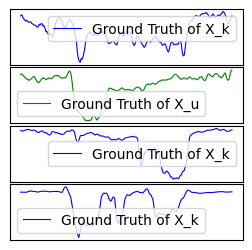

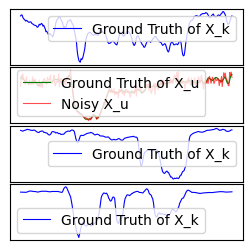

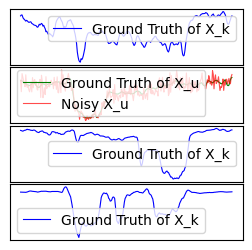

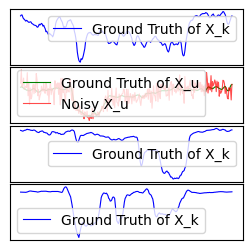

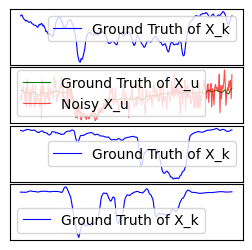

In [142]:
# Define the window size for smoothing
window_size = 5
start_k = 13
line_width = 0.8

# Calculate the moving average for each line
smoothed_lines = []
for i in range(4):
    line = data_raw[0, :, start_k + i]
    smoothed_line = np.convolve(line, np.ones(window_size)/window_size, mode='same')
    smoothed_lines.append(smoothed_line)

weighted_noise_arr = []

for t in range(-1, 50 , 10):

    # Plot the smoothed lines
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(3, 3))

    # Decrease vertical spacing between subplots
    plt.subplots_adjust(hspace=0.05)

    for i, ax in enumerate(axes):
        if i == 1:
            ax.plot(range(2, 286), smoothed_lines[i][2:-2], label='Ground Truth of X_u', color='g', linewidth=line_width)
            if t >= 0:
                diff_line, curr_noise = diffusion_result(smoothed_lines[i], t)
                ax.plot(range(2, 286), diff_line[2:-2], label='Noisy X_u', color='r',alpha=0.7, linewidth=line_width)
                weighted_noise_arr.append(curr_noise)
        else:
            ax.plot(range(2, 286), smoothed_lines[i][2:-2], label='Ground Truth of X_k', color='b', linewidth=line_width)
        
        # Remove x-axis ticks
        ax.set_xticks([])

        # Remove y-axis ticks
        ax.set_yticks([])        

        ax.legend()

    plt.savefig(f"{t}.svg")
plt.close()

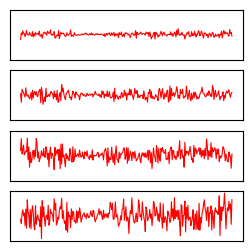

In [143]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(3, 3),sharex=True, sharey=True)
for i, ax in enumerate(axes):
    ax.plot(range(2, 286), weighted_noise_arr[i][2:-2], label='weighted noise', color='r', linewidth=line_width)
    # Remove x-axis ticks
    ax.set_xticks([])
    # Remove y-axis ticks
    ax.set_yticks([])

plt.savefig("added_noise.svg")
